# Analisis: Violencia Laboral hacia Mujeres en Ciudad de México

**Fuente** Encuestas realizadas a algunas empesas de la CDMX (2023).

## Objetivos
1. 1Identificar patrones de violencia laboral hacia mujeres
2. Analizar su impacto en la salud física y mental
3. Examinar los tipos de agresores más comunes
4. Evaluar las diferentes formas de violencia reportadas

## 📊 Métodología  
- **Herramientas**: Python (Pandas, Seaborn, Matplotlib).

- **Limitaciones**: Muestra no aleatoria (sesgo de respuesta).  

### Inicio
El análisis se realizó a traves del uso de información obtenida y estructurada por utilizando Python y las siguientes librerias:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Se cargaron 5 conjuntos de datos previamente selecciónados con el fin de resolver algunas preguntas clave de la investigación.

In [30]:
#Cargamos nuestros archivos
empresas = pd.read_csv("C:/Users/sator/Documents/Cursos y Diplomados/Revista/data/processed/empresas_encuestadas.csv", encoding ="latin-1")
padecimientos_fisicos = pd.read_csv("C:/Users/sator/Documents/Cursos y Diplomados/Revista/data/processed/padecimientos_fisicos.csv", encoding = "latin-1")
padecimientos_psicologicos = pd.read_csv("C:/Users/sator/Documents/Cursos y Diplomados/Revista/data/processed/padecimientos_psicologicos.csv", encoding ="latin-1")
tipos_agresor = pd.read_csv("C:/Users/sator/Documents/Cursos y Diplomados/Revista/data/processed/tipos_agresor.csv", encoding ="latin-1")
tipos_violencia = pd.read_csv("C:/Users/sator/Documents/Cursos y Diplomados/Revista/data/processed/tipos_violencia.csv", encoding ="latin-1")

## Particiáción en Encuestas por Delegación y Tipo de Empresa
La tabla contenía los datos reelevantes de Dependencias tanto del Gobierno Federal como de Dependencia Estatal en 5 Alcaldías.

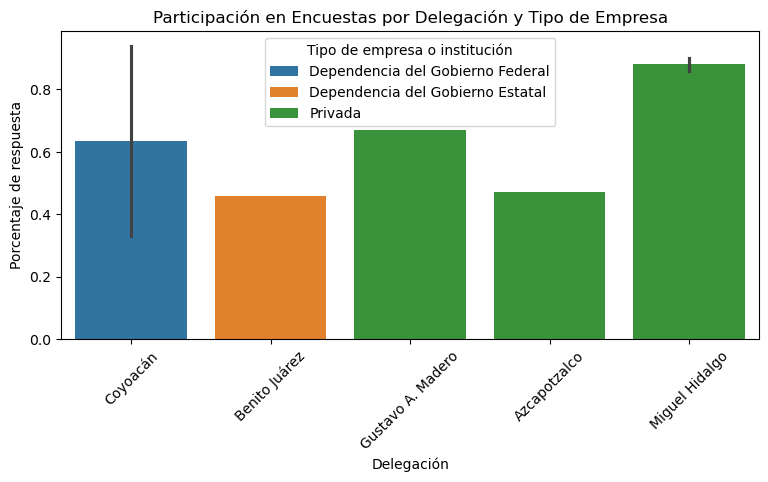

In [10]:
#Gráfico de barras: Porcentaje de respuesta or delegación
plt.figure(figsize=(9,4))
sns.barplot(data = empresas, x = "Delegación", y = "Porcentaje de respuesta", hue = "Tipo de empresa o institución")
plt.title("Participación en Encuestas por Delegación y Tipo de Empresa")
plt.xticks(rotation=45)
plt.savefig("C:/Users/sator/Documents/Cursos y Diplomados/Revista/visualizaciones/graficos/empressa_respuesta.png",bbox_inches="tight", dpi=300, )

La delegación con mayor participación fue de la alcaldía Miguiel Hidalgo con 2 empresas entrevistadas y  un porcentaje de 86% y la otra con 90% respectivamente.

"La variación en tasas de respuesta podría indicar diferencias culturales organizacionales entre delegaciones o sectores empresariales. Las empresas con políticas de transparencia bien establecidas tienden a participar más en este tipo de investigaciones."

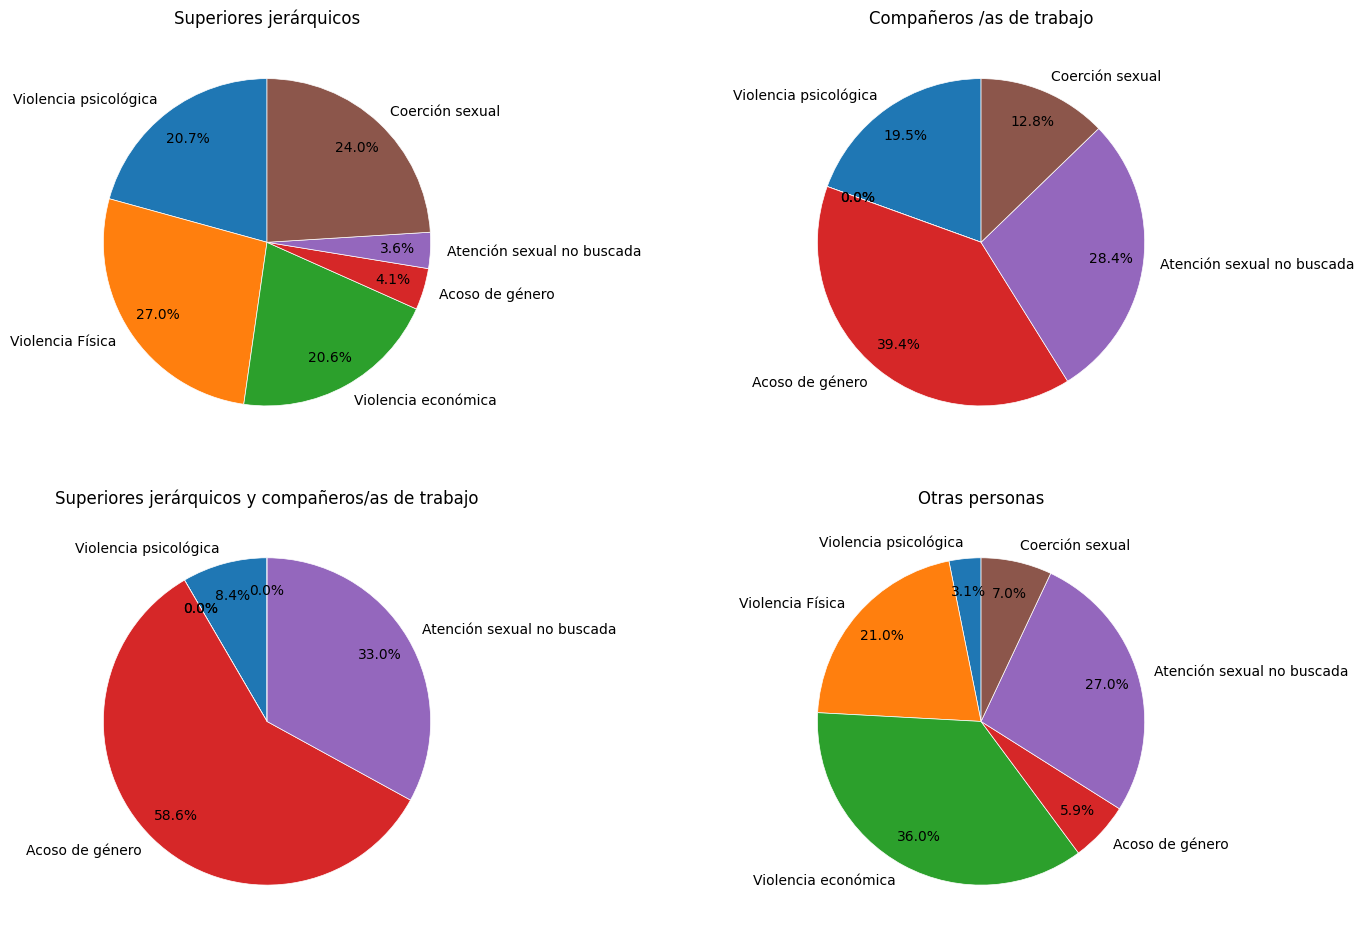

In [3]:
import matplotlib.pyplot as plt

# Configurar el índice (ya lo haces correctamente)
tipos_agresor.set_index("Tipo de Violencia/tipo de agresor", inplace=True)

# Crear una figura con subgráficos organizados en 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 filas, 2 columnas
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Iterar sobre cada columna y dibujar un pie chart en su propio subgráfico
for i, col in enumerate(tipos_agresor.columns):
    tipos_agresor[col].plot.pie(
        ax=axes[i],  # Asignar a un subgráfico específico
        autopct="%1.1f%%",
        startangle=90,
        textprops={"fontsize": 10, "color": "black"},  # Tamaño de fuente ajustable
        pctdistance=0.8,  # Alejar porcentajes del centro
        wedgeprops={"edgecolor": "white", "linewidth": 0.5},  # Bordes definidos
    )
    axes[i].set_title(col, fontsize=12, pad=10)  # Título de cada subgráfico
    axes[i].set_ylabel("")  # Eliminar etiqueta del eje Y

# Ajustar espaciado entre subgráficos
plt.tight_layout(pad=3.0)

# Guardar la figura
plt.savefig(
    "C:/Users/sator/Documents/Cursos y Diplomados/Revista/visualizaciones/graficos/agresores_pie.png",
    bbox_inches="tight",  # Evitar recortes
    dpi=300,  # Alta resolución
)
plt.show()

## Impacto en la Salud Física

Es importante destacar que la violencia contra las mujeres en el ámbito laboral no solo afecta a la víctima individualmente, sino que también tiene consecuencias negativas para la organización y la sociedad en su conjunto, incluyendo la disminución de la productividad, el desprestigio de la empresa y la perpetuación de la discriminación. 

La exposición a situaciones de acoso, hostigamiento o agresiones puede desencadenar problemas de salud como lo son:

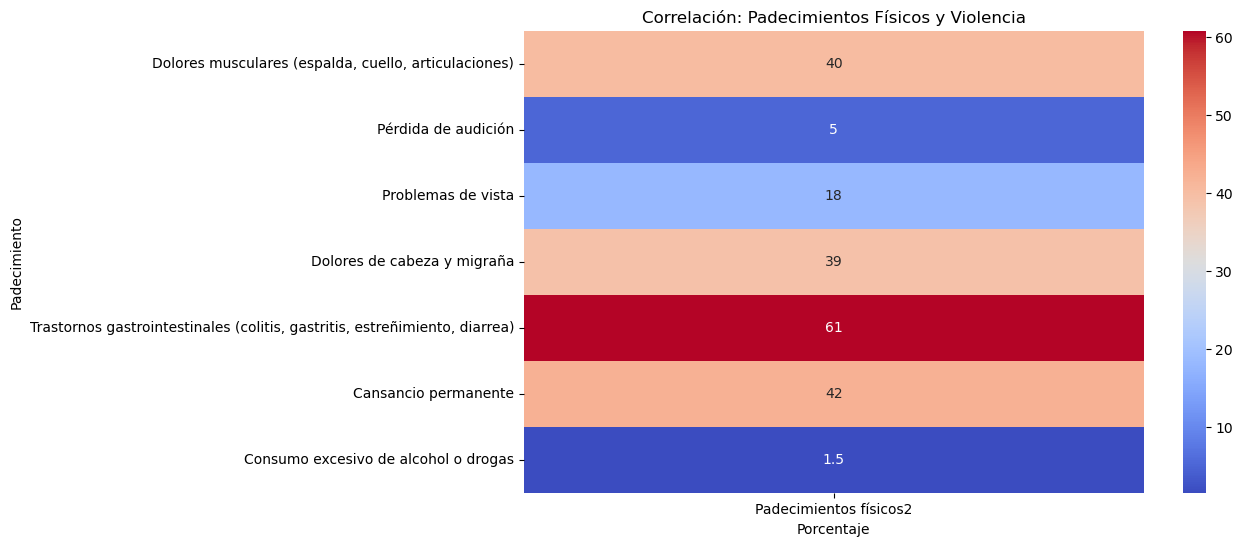

In [37]:
#Mapa de Calor: Correlación entre tipos de violencia y padecimientos
padecimientos_fisicos.set_index("Padecimientos físicos", inplace=True)
datos_numericos = padecimientos_fisicos[["Padecimientos físicos2"]]
plt.figure(figsize=(10,6))
sns.heatmap(padecimientos_fisicos[["Padecimientos físicos2"]], annot=True, cmap="coolwarm", yticklabels=padecimientos_fisicos.index)
plt.title("Correlación: Padecimientos Físicos y Violencia")
plt.xlabel("Porcentaje")
plt.ylabel("Padecimiento")
plt.show
plt.savefig("C:/Users/sator/Documents/Cursos y Diplomados/Revista/visualizaciones/graficos/heatmap_fisiscos.png",bbox_inches="tight", dpi=300,)

#### Hallazgo Preocupante

"El 61% de las encuestadas que experimentaron estos tipos de Violencia  desarrollaron síntomas de caracter gastrointestinal debido a estrés crónico, ansiedad y depresión que puede generar.

In [ ]:
Otro de los padecimientos más alarmantes resalta en la salud psicológica como lo podemos identificar a continuación.

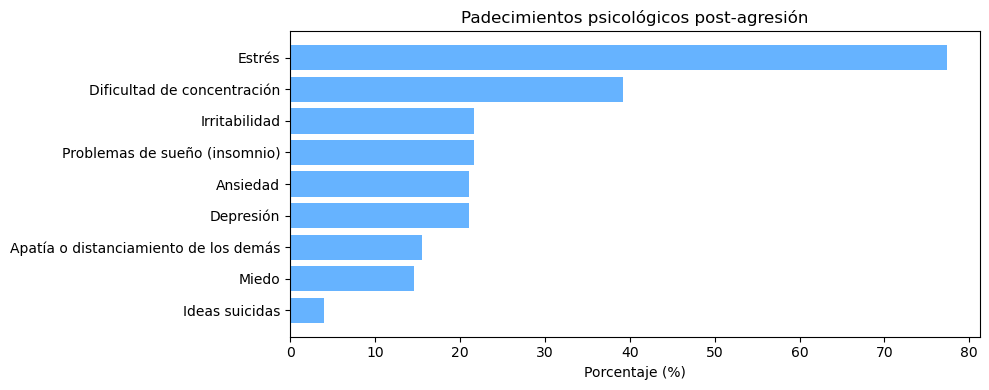

In [11]:
# Ordenar por la columna de porcentaje (ej: "Padecimientos psicológicas2")
df_sorted = padecimientos_psicologicos.sort_values("Padecimientos psicológicas2", ascending=False)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 4))
plt.barh(
    df_sorted["Padecimientos psicológicas"], 
    df_sorted["Padecimientos psicológicas2"],
    color="#66b3ff"
)
plt.xlabel("Porcentaje (%)")
plt.title("Padecimientos psicológicos post-agresión")
plt.gca().invert_yaxis()  # Padecimiento más alto en la parte superior
plt.tight_layout()
plt.savefig("C:/Users/sator/Documents/Cursos y Diplomados/Revista/visualizaciones/graficos/barh_psico.png",bbox_inches="tight", dpi=300, )
plt.show()